<a href="https://colab.research.google.com/github/murakami-hy/Prog2kakushin/blob/main/work3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

モザイク画像からなんの画像かを当てるゲームのプログラムです

はじめにカラー画像か白黒画像を選択してください

そして、モザイクのかかった画像をランダムで表示し、解答欄に、なんの画像なのか予想を入力します

あらかじめそれぞれの画像に対して考えうる単語のリストをつくり、その中に解答した単語が含まれていたら、**正解!!**と表示し、含まれていなかったら**不正解**と表示します

最大5回まで解答可能で間違えるたびにモザイクは薄くしていきます

正解するか、5回間違えたら元の画像と解答例を表示し、ゲームを続けるかどうか選択します




まず,画像を読み込むために以下のコードを実行してください.

In [ ]:
!curl -sc /tmp/cookie "https://drive.google.com/uc?export=download&id=1iWDmA-yN7gj4bgPsAw4z-4nMLPrWGh96" > /dev/null
!CODE="$(awk '/_warning_/ {print $NF}' /tmp/cookie)"  
!curl -Lb /tmp/cookie "https://drive.google.com/uc?export=download&confirm=${CODE}&id=1iWDmA-yN7gj4bgPsAw4z-4nMLPrWGh96" -o illustration.zip
!unzip -o illustration.zip

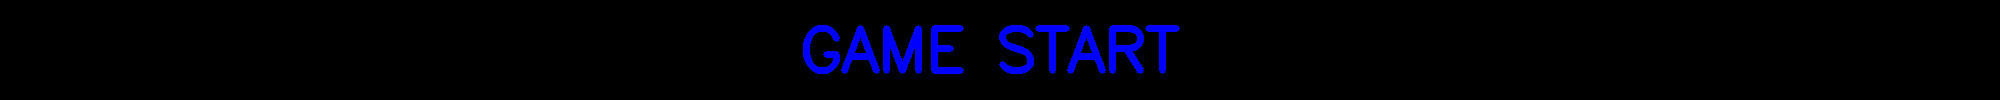

画像の種類を選択してください
1:カラー画像  2:白黒画像  2


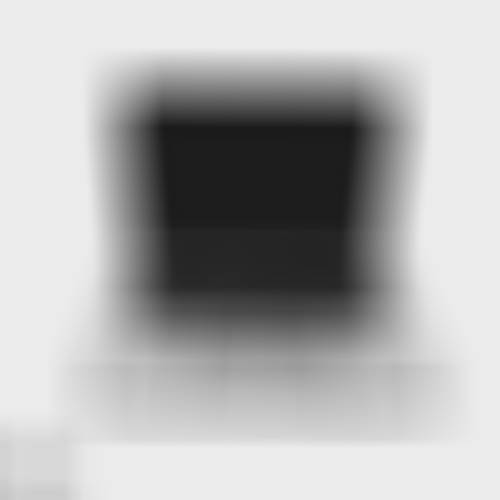

[問題]これは何のイラストでしょうか? 
解答: ぱそこん
正解!!
正解はこちら


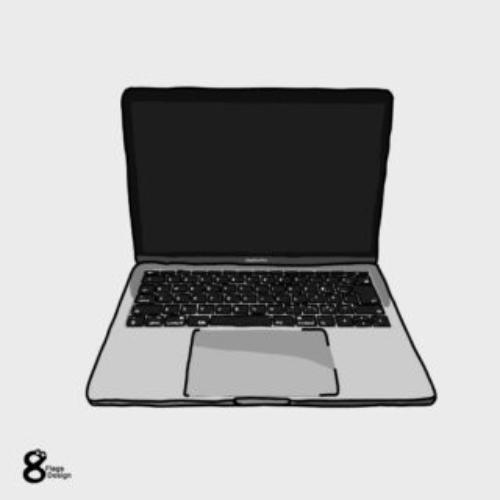

解答例
['パソコン', 'ノートパソコン', 'pc', 'ぱそこん', 'のーとぱそこん']
もう一度挑戦しますか？ 
1:はい 2:いいえ  1
画像の種類を選択してください
1:カラー画像  2:白黒画像  2


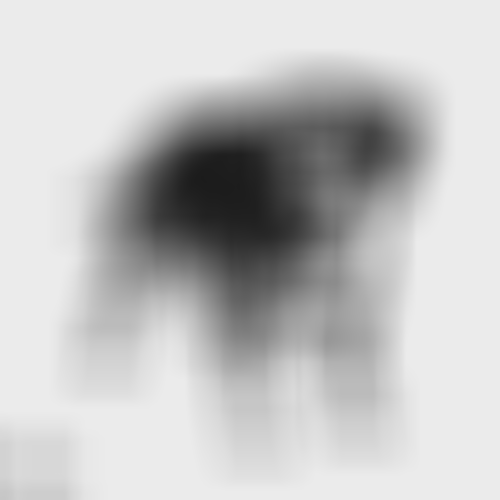

[問題]これは何のイラストでしょうか? 
解答: さる
不正解


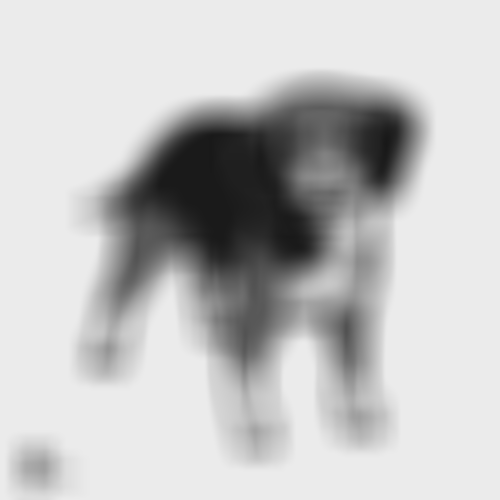

2回目の解答:いぬ
正解!!
正解はこちら


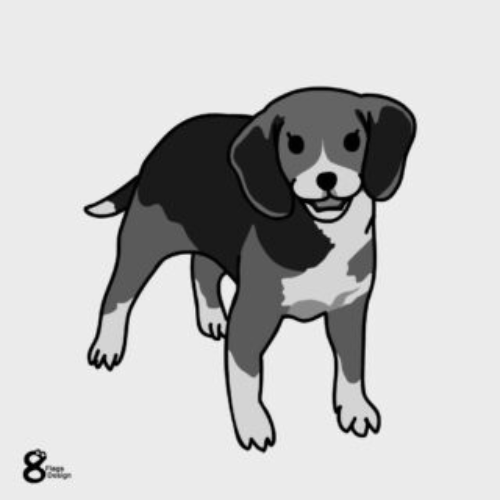

解答例
['いぬ', '犬', 'イヌ']
もう一度挑戦しますか？ 
1:はい 2:いいえ  2
ゲームを終了しました


In [ ]:
import numpy as np
import cv2, sys, glob ,os
import random
from google.colab.patches import cv2_imshow
from natsort import natsorted

def kotae(ans,bokasi,count):
 for i in range(5):
  if ans in anslist[r]:
   print('正解!!')
   break
  else:
   print('不正解')
   count+=1
   bokasi=int(bokasi/2)
   if bokasi==2:
     return
   imgg=cv2.blur(img,(bokasi,bokasi))
   cv2_imshow(imgg)
   ans2=input(str(count)+'回目の解答:')
   return kotae(ans2,bokasi,count)





file_list = glob.glob('illustration/*')
new_filelist = natsorted(file_list)
#print(new_filelist)
#print(len(new_filelist))




img_new = np.zeros((100, 2000,3), np.uint8)
cv2.putText(img_new,
            text='GAME START',
            org=(800, 70),
            fontFace=cv2.FONT_ITALIC,
            fontScale=2.0,
            color=(255, 0, 0),
            thickness=5,
            lineType=cv2.LINE_4)

cv2_imshow(img_new)



while True: 
 r=random.randint(1,41)
 #print(r)
 #print(new_filelist[r])
 file = new_filelist[r]
 img = cv2.imread( file )
 img = cv2.resize( img, (500,500) )

 
 print('画像の種類を選択してください')
 a=int(input('1:カラー画像  2:白黒画像  '))
 if a==2:
   img = cv2.cvtColor( img, cv2.COLOR_BGR2GRAY )

 if img is None:
    sys.exit(f'エラー: ファイルを開けませんでした {file}')
 #cv2_imshow(img) 

 bokasi=80
 img2 = cv2.blur(img,(bokasi,bokasi))
 cv2_imshow(img2)

 print('[問題]これは何のイラストでしょうか? ')
 ans=input('解答: ') 
 anslist=[['アボカド','あぼかど'],['あじさい','アジサイ','紫陽花'],['バッグ','バック','ばっく','バック','トートバック','トートバッグ','とーとばっく','とーとばっぐ','かばん','鞄','カバン'],['風船','ふうせん','フウセン'],['けーき','ケーキ','しょーとけーき','ショートケーキ'],['くるま','車','クルマ'],['ねこ','猫','ネコ'],['いす','椅子','イス'],['コーヒー','こーひー','エスプレッソ','えすぷれっそ','カフェラテ','かふぇらて','ミルクティー','みるくてぃー'],['クレープ','くれーぷ'],
         ['マグカップ','まぐかっぷ','こっぷ','コップ','かっぷ','カップ'],['いぬ','犬','イヌ'],['エビフライ','えびふらい'],['めがね','眼鏡','メガネ'],['ハンバーガー','はんばーがー','チーズバーガー','ちーずばーがー'],['ひまわり','ヒマワリ','向日葵','花束','はなたば',],['アイスクリーム','あいすくりーむ','あいす','アイス'],['ジュース','コーラ','こーら','じゅーす','ドリンク','どりんく'],['クレヨン','クレパス','くれよん','くれぱす'],['くろわっさん','クロワッサン','ぱん','パン'],
         ['らんぷ','ランプ','ライト','らいと','ベッドサイドランプ','べっどさいどらんぷ'],['れもん','レモン'],['松ぼっくり','まつぼっくり','マツボックリ'],['まいく','マイク'],['鍋','なべ','ナベ'],['にわとり','鶏','ニワトリ'],['たまねぎ','玉ねぎ','タマネギ'],['おれんじ','オレンジ','みかん','ミカン'],['パンケーキ','ぱんけーき','ホットケーキ','ほっとけーき'],['パソコン','ノートパソコン','pc','ぱそこん','のーとぱそこん'],
         ['ぶた','豚','ブタ'],['まくら','枕','マクラ','クッション','くっしょん'],['パイナップル','ぱいなっぷる','パイン','ぱいん'],['ぽてと','ポテト','フライドポテト','ふらいどぽてと'],['ぷれぜんと','プレゼント','小包','こづつみ'],['さぼてん','サボテン','観葉植物','かんようしょくぶつ'],['靴','くつ','スニーカー','すにーかー'],['みにとまと','ミニトマト','トマト','とまと'],['チューリップ','ちゅーりっぷ'],['やかん','ヤカン']]

 count=1
 kotae(ans,bokasi,count)
 print('正解はこちら')
 cv2_imshow(img)
 print('解答例')
 print(anslist[r])
 print('もう一度挑戦しますか？ ')
 x=int(input('1:はい 2:いいえ  '))
 if x==2:
   break
print('ゲームを終了しました')

